<a href="https://colab.research.google.com/github/SaiArjunSairamje/Python_Libraries/blob/main/07.%20Pandas_3%20(Dataset%3A%20IMDB_Contd.)%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Dataset "IMDB Director Insights"**
***

In [ ]:
import pandas as pd
import numpy as np

!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

movies = pd.read_csv('movies.csv', index_col=0)
directors = pd.read_csv('directors.csv',index_col=0)

data = movies.merge(directors, how='left', left_on='director_id',right_on='id')
data.drop(['director_id','id_y'],axis=1,inplace=True)

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 118MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 115MB/s]


# **Similar to "Vectarization" in NumPy, let's learn "apply()" function in Pandas (Cont. from last lecture)...**
***
Similar to **"Vectarization"** that we had learnt previously in **"NumPy"**, we have something called **"apply()"** in "Pandas" that we will learn in-deepth in this class.

In pandas, the **apply()** function is used to apply a function along either the rows or columns of a DataFrame. It allows you to perform custom operations on the data within each row or column. The **apply()** function can be used in different scenarios, such as applying a built-in or user-defined function to each element, calculating summary statistics, or transforming the data.

Here are a few examples to illustrate the usage of **apply()**:

> **(1) Applying a user-defined function**

> **(2) Applying a built-in function**

> **(3) Applying a lambda function**

In these examples, the **apply()** function is used to apply a specific operation **`(user-defined function, built-in, lambda function)`** to each element of the DataFrame, resulting in a modified DataFrame.



### **Under the "gender" column, let's make Male as 0 & Female as 1 for each rows.**    

> **(1) Applying a user-defined function**

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [ ]:
def encode(g):
  if g == "Male":
    return 0
  else:
    return 1

In [ ]:
# Apply the function to specific column

data["gender"] = data["gender"].apply(encode) #default axis = 0

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0


### **If we send 2 columns now using the "apply()" function, the o/p will have row wise o/p's or just a single o/p ???**

> **(2) Applying a built-in function**


In [ ]:
data[["revenue" , "budget"]].apply(np.sum) # column wise operation since defauy axis = 0

revenue    209866997305
budget      70353617179
dtype: int64

In [ ]:
data[["revenue" , "budget"]].apply(np.sum, axis = 1) # row wise operation since axis = 1

0       3024965087
1       1261000000
2       1125674609
3       1334939099
4       1148871626
           ...    
1460        321952
1461       3178130
1462             0
1463             0
1464       2260920
Length: 1465, dtype: int64

In [ ]:
# Another normal python way to do row wise operation

data["revenue"] + data["budget"]

0       3024965087
1       1261000000
2       1125674609
3       1334939099
4       1148871626
           ...    
1460        321952
1461       3178130
1462             0
1463             0
1464       2260920
Length: 1465, dtype: int64

### **How to find the Profit for every movie ???**

In [ ]:
def prof(x):
  return x["revenue"] - x["budget"]

In [ ]:
data["profit"] = data[["revenue" , "budget"]].apply(prof, axis = 1)  # row level calculaton

In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,profit
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,0,2550965087
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,0,661000000
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,0,635674609
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,0,834939099
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,0,632871626


# **Starting fresh for new topic**

In [ ]:
import pandas as pd
import numpy as np

!gdown 1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
!gdown 1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm

movies = pd.read_csv('movies.csv', index_col=0)
directors = pd.read_csv('directors.csv',index_col=0)

data = movies.merge(directors, how='left', left_on='director_id',right_on='id')
data.drop(['director_id','id_y'],axis=1,inplace=True)

Downloading...
From: https://drive.google.com/uc?id=1s2TkjSpzNc4SyxqRrQleZyDIHlc7bxnd
To: /content/movies.csv
100% 112k/112k [00:00<00:00, 40.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ws-_s1fHZ9nHfGLVUQurbHDvStePlEJm
To: /content/directors.csv
100% 65.4k/65.4k [00:00<00:00, 68.1MB/s]


In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


### **Tell me all the Movies that was created by "Christopher Nolan"**

In [ ]:
data[data["director_name"] == "Christopher Nolan"]  # Masking

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
45,43662,185000000,187,1004558444,The Dark Knight,8.2,12002,2008,Jul,Wednesday,Christopher Nolan,Male
58,43692,165000000,724,675120017,Interstellar,8.1,10867,2014,Nov,Wednesday,Christopher Nolan,Male
59,43693,160000000,167,825532764,Inception,8.1,13752,2010,Jul,Wednesday,Christopher Nolan,Male
74,43716,150000000,115,374218673,Batman Begins,7.5,7359,2005,Jun,Friday,Christopher Nolan,Male
565,44630,46000000,41,113714830,Insomnia,6.8,1148,2002,May,Friday,Christopher Nolan,Male
641,44793,40000000,74,109676311,The Prestige,8.0,4391,2006,Oct,Thursday,Christopher Nolan,Male
1341,47170,9000000,60,39723096,Memento,8.1,4028,2000,Oct,Wednesday,Christopher Nolan,Male


But the better approach is by using the **"loc()"** function as per company standard and by getting the o/p with only the **title** of the **movies**...

In [ ]:
data.loc[ data["director_name"] == "Christopher Nolan", ["title"]]

,title
3,The Dark Knight Rises
45,The Dark Knight
58,Interstellar
59,Inception
74,Batman Begins
565,Insomnia
641,The Prestige
1341,Memento


### **Tell me the count of movies created by "Christopher Nolan"**

In [ ]:
data.loc[ data["director_name"] == "Christopher Nolan", ["title"]].count()

title    8
dtype: int64

**`NOTE:`** The above code is similar to **Group By** and **Count** as aggregation in **SQL** if you remember...

In **Python Pandas** library, if we take this **value_counts()** code below as an example, internally the **Group By**, **Count as aggreagation** & **Order By in desceding** is done...Hence, you can see how easy it is in **Python** compared to **SQL**...

In [ ]:
data["director_name"].value_counts()

Steven Spielberg      26
Martin Scorsese       19
Clint Eastwood        19
Woody Allen           18
Ridley Scott          16
                      ..
Tim Hill               5
Jonathan Liebesman     5
Roman Polanski         5
Larry Charles          5
Nicole Holofcener      5
Name: director_name, Length: 199, dtype: int64


# **What is Grouping of data in Pandas ?**
***
Simply, the internal work could be understood through the terms - **Split** **`(i.e. "Group By" in SQL)`**, **apply** **`(i.e. "Aggregation as Sum" in SQL)`**, **combine** **`(i.e. "o/p vaule that combines the Split & Aggregartion values")`**

<img src="https://learning.oreilly.com/api/v2/epubs/urn:orm:book:9781491912126/files/assets/pyds_03in01.png" height = 350/>

(**`NOTE:`** It's important to learn and understand **"Functional Programming"** like **map**, **filter**, **lambda function**, etc. which we will learn...)

In [ ]:
data.groupby('director_name')  # we get the DataFrameGroupBy object as o/p & we can do multiple operations on that...

### **(1) What we'll learn now `(i.e. group by/split functions)`**

> **ngroups attribute:** The **ngroups** attribute returns the number of groups in the grouped data.

> **groups attribute:** The **groups** attribute returns a dictionary where the keys are the unique group names, and the values are the corresponding indices or labels of the original DataFrame that belong to each group.

> **get_group() method:** The **get_group()** method allows you to retrieve a specific group from the grouped data based on the group name.

### **How many groups do we have under the "director_name" column ???**

In [ ]:
data.groupby('director_name').ngroups  #this will tell how many groups are present similar to what we save in "data["director_name"].value_counts()" above

199

### **I don't want just the count but I want to see the groups as well under the "director_name" column.**

In [ ]:
data.groupby('director_name').groups  #we get o/p as Dictionary that gives each Director group name as key and the Row Numbers as the values...

{'Adam McKay': [176, 323, 366, 505, 839, 916], 'Adam Shankman': [265, 300, 350, 404, 458, 843, 999, 1231], 'Alejandro González Iñárritu': [106, 749, 1015, 1034, 1077, 1405], 'Alex Proyas': [95, 159, 514, 671, 873], 'Alexander Payne': [793, 1006, 1101, 1211, 1281], 'Andrew Adamson': [11, 43, 328, 501, 947], 'Andrew Niccol': [533, 603, 701, 722, 1439], 'Andrzej Bartkowiak': [349, 549, 754, 911, 924], 'Andy Fickman': [517, 681, 909, 926, 973, 1023], 'Andy Tennant': [314, 320, 464, 593, 676, 885], 'Ang Lee': [99, 134, 748, 840, 1089, 1110, 1132, 1184], 'Anne Fletcher': [610, 650, 736, 789, 1206], 'Antoine Fuqua': [310, 338, 424, 467, 576, 808, 818, 1105], 'Atom Egoyan': [946, 1128, 1164, 1194, 1347, 1416], 'Barry Levinson': [313, 319, 471, 594, 878, 898, 1013, 1037, 1082, 1143, 1185, 1345, 1378], 'Barry Sonnenfeld': [13, 48, 90, 205, 591, 778, 783], 'Ben Stiller': [209, 212, 547, 562, 850], 'Bill Condon': [102, 307, 902, 1233, 1381], 'Bobby Farrelly': [352, 356, 481, 498, 624, 630, 654, 80

### **How to filter out a particular group from the dictionary ???**

**`NOTE:`** This is like **`Having Clause`** in **`SQL`**...

In [ ]:
data.groupby('director_name').get_group('Adam McKay')

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
176,43882,100000000,24,170432927,The Other Guys,6.1,1383,2010,Aug,Friday,Adam McKay,Male
323,44151,72500000,12,162966177,Talladega Nights: The Ballad of Ricky Bobby,6.2,491,2006,Aug,Friday,Adam McKay,Male
366,44236,65000000,22,128107642,Step Brothers,6.5,1062,2008,Jul,Friday,Adam McKay,Male
505,44503,50000000,38,173649015,Anchorman 2: The Legend Continues,6.0,923,2013,Dec,Wednesday,Adam McKay,Male
839,45301,28000000,57,133346506,The Big Short,7.3,2607,2015,Dec,Friday,Adam McKay,Male
916,45443,26000000,29,90574188,Anchorman: The Legend of Ron Burgundy,6.7,1493,2004,Jul,Friday,Adam McKay,Male


### **(2) What we'll learn now `(i.e. aggregation functions)`**

> **count()**      
> **min()**          
> **max()**          
> **aggregate()**

### **How to count the number of rows/movies of the groups in the "director_name" column ???**

In [ ]:
# Count total number of titles for director name

data.groupby('director_name')['title'].count() #complete this to get same oputput as value_counts() --> 5 mins

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64

In [ ]:
data["director_name"].value_counts()

Steven Spielberg      26
Martin Scorsese       19
Clint Eastwood        19
Woody Allen           18
Ridley Scott          16
                      ..
Tim Hill               5
Jonathan Liebesman     5
Roman Polanski         5
Larry Charles          5
Nicole Holofcener      5
Name: director_name, Length: 199, dtype: int64

### **Why is the o/p of "groupby()[].count()" and "value_counts()" different ???**

**`NOTE:`** if you check the **data.groupby('director_name')['title'].count()** approach with the **data["director_name"].value_counts()** approach below, it's **`not the same`**. Why is that ???

The expressions **data["director_name"].value_counts()** and **data.groupby('director_name')['title'].count()** are not exactly the same because they produce different results, even though they both involve counting the occurrences of each unique value in the 'director_name' column.

**Here's the difference between the two:-**

> **data["director_name"].value_counts()**   

This expression counts the occurrences of each unique value in the 'director_name' column and returns a pandas Series object with the unique values as the index and the corresponding counts as the values. The resulting Series is sorted in descending order based on the counts.


In [ ]:
director_counts = data["director_name"].value_counts()
print(director_counts)

Steven Spielberg      26
Martin Scorsese       19
Clint Eastwood        19
Woody Allen           18
Ridley Scott          16
                      ..
Tim Hill               5
Jonathan Liebesman     5
Roman Polanski         5
Larry Charles          5
Nicole Holofcener      5
Name: director_name, Length: 199, dtype: int64


> **data.groupby('director_name')['title'].count()**   

This expression groups the data by unique values in the 'director_name' column and then counts the number of occurrences of 'title' within each group. It returns a pandas Series object with the unique values in the 'director_name' column as the index and the corresponding counts of 'title' as the values.

The main difference between the two approaches is that **value_counts()** returns the counts of all unique values in the 'director_name' column, regardless of other columns, whereas **groupby()** considers the 'title' column specifically and provides the count of 'title' for each unique 'director_name'.   

If you only need to count the occurrences of each unique value in the 'director_name' column and don't need any additional information, **data["director_name"].value_counts()** is a more concise approach. However, if you want to perform further analysis or calculations based on other columns within each group, using **groupby()** allows you to access and manipulate the grouped data more flexibly.

In [ ]:
director_counts = data.groupby('director_name')['title'].count()
print(director_counts)

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64


### **Among all the diretors, who is the most efficient director `(i.e. Multiple aggreagation function over a column)`???**

 By efficient, I mean not only the highest number of movies but also the highest number of movies within a timeframe like 1 year...So the correct approach would be to find the **Average number of movies per year**...

**`NOTE:`How to find the avg movies per year ???**        
In **SQL** we use to find the **average movie per year** by using the **min_year** and **max_year** function (i.e. **min()** & **max()**). So we will work the same way here as well...

In [ ]:
data.groupby("director_name")["year"].aggregate(["min" , "max"]) #NOTE: we have provided min & max as a "Text"

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


### **How to get back to the default index values after we have performed this grouping ???**

In [ ]:
data.groupby("director_name")["year"].aggregate(["min" , "max"]).reset_index()

,director_name,min,max
0,Adam McKay,2004,2015
1,Adam Shankman,2001,2012
2,Alejandro González Iñárritu,2000,2015
3,Alex Proyas,1994,2016
4,Alexander Payne,1999,2013
...,...,...,...
194,Wes Craven,1984,2011
195,Wolfgang Petersen,1981,2006
196,Woody Allen,1977,2013
197,Zack Snyder,2004,2016


### **Show me data of only those directors who have done atleast 1 movie > than 10 million budget.**

In [ ]:
data_dir_budget = data.groupby("director_name")["budget"].max() # group by directors based on having the maximum budget...

In [ ]:
data_dir_budget.head() # this is working as Index. So let's get this fixed as well...

director_name
Adam McKay                     100000000
Adam Shankman                   80000000
Alejandro González Iñárritu    135000000
Alex Proyas                    140000000
Alexander Payne                 30000000
Name: budget, dtype: int64

In [ ]:
data_dir_budget = data.groupby("director_name")["budget"].max().reset_index()

In [ ]:
print(data_dir_budget)

                   director_name     budget
0                     Adam McKay  100000000
1                  Adam Shankman   80000000
2    Alejandro González Iñárritu  135000000
3                    Alex Proyas  140000000
4                Alexander Payne   30000000
..                           ...        ...
194                   Wes Craven   40000000
195            Wolfgang Petersen  175000000
196                  Woody Allen   30000000
197                  Zack Snyder  250000000
198                  Zhang Yimou   94000000

[199 rows x 2 columns]


In [ ]:
# NOTE: You can do the same using aggregate() function as well

data_dir_budget = data.groupby("director_name")["budget"].aggregate(max).reset_index()

In [ ]:
data_dir_budget

,director_name,budget
0,Adam McKay,100000000
1,Adam Shankman,80000000
2,Alejandro González Iñárritu,135000000
3,Alex Proyas,140000000
4,Alexander Payne,30000000
...,...,...
194,Wes Craven,40000000
195,Wolfgang Petersen,175000000
196,Woody Allen,30000000
197,Zack Snyder,250000000


In [ ]:
# Show me data of only those directors who have done atleast 1 movie > than 10 million budget.

names = data_dir_budget.loc[ data_dir_budget["budget"] > 10000000, ["director_name"]]

In [ ]:
print(names)

                   director_name
0                     Adam McKay
1                  Adam Shankman
2    Alejandro González Iñárritu
3                    Alex Proyas
4                Alexander Payne
..                           ...
194                   Wes Craven
195            Wolfgang Petersen
196                  Woody Allen
197                  Zack Snyder
198                  Zhang Yimou

[197 rows x 1 columns]


In [ ]:
# Show me data of only those directors who have done atleast 1 movie > than 100 million budget.

names = data_dir_budget.loc[ data_dir_budget["budget"] > 100000000, ["director_name"]]

In [ ]:
names

,director_name
2,Alejandro González Iñárritu
3,Alex Proyas
5,Andrew Adamson
10,Ang Lee
15,Barry Sonnenfeld
...,...
185,Tim Story
187,Tom Shadyac
188,Tom Tykwer
195,Wolfgang Petersen


In [ ]:
data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


**How to show the data in which there are directors who have done atleast 1 movie > than 100 million budget???**

By data, I mean the entire rows of such directors...


In [ ]:
# Show me data of only those directors who have done atleast 1 movie > than 100 million budget.

data.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male


In [ ]:
# We have learnt that we can use an easier method using "isin()", which is similar to "subqueries" in "SQL"...
# NOTE: this data is all the directors and not that is greater than 100M...

data.loc[data["director_name"].isin(names['director_name'])]

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,48267,400000,33,100000000,Mad Max,6.6,1213,1979,Apr,Thursday,George Miller,Male
1451,48268,200000,13,4505922,Swingers,6.8,253,1996,Oct,Friday,Doug Liman,Male
1452,48274,0,5,2611555,Three,6.3,31,2010,Dec,Thursday,Tom Tykwer,Male
1458,48335,60000,27,3221152,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male


In [ ]:
# For knowing the directors who have done atleast 1 movie > than 100 million budget, a simple Masking would so the trick...

# **Functional Programming**
***
This is just an overview lecture and we will learn the full topic in **"Advanced Python"** lecture...

> **lambda:** Anonymous functions used for defining small, one-line functions without a formal name. They are often used as inline functions or as arguments to other functions.

> **map():** Applies a function to each element of an iterable and returns an iterator of the results.

> **filter():** Creates an iterator with elements from an iterable that satisfy a specified condition based on a function.

### **(1) Lambda function**

In functional programming, **lambda functions**, also known as **anonymous functions**, play a significant role. A lambda function is a way to define a function without assigning it a name. It is typically used for short-lived operations or as arguments to higher-order functions.

Here's the basic syntax of a **lambda** function:

> **`lambda arguments: expression`**

What we'll learn in this:

> Simple **Mathematical functions** to **"Lambda Functions"**         

> Simple "**If-else condition"** to **"Lambda Functions"**

### **Write a function that returns a cube of a given number...**

In [ ]:
# Normal Python approach

def cube_n(a):
  return a**3

In [ ]:
ans = cube_n(4)
print(ans)

64


In [ ]:
# Let's try to do the same using "Lambda" function

a = lambda x: x ** 3  # that is, given an input x, return a cube of that input (i.e. x**3) where "a" is working as a function name...

In [ ]:
a(3)

27

In [ ]:
a(4)

64

In [ ]:
a(2)

8

### **How to create a lambda function using 2 variables ???**

**Ex:** power(a,b) --> a**b

In [ ]:
power = lambda a, b : a**b

In [ ]:
power(2,3)

8

In [ ]:
power(3,2)

9

### **Write a lambda function that takes 3 values and returns the sum of those 3 values.**

In [ ]:
sum = lambda a, b, c: a+b+c    #here we have sum as function name

In [ ]:
sum(3,5,1)   #this is nothing but the parameters

9

In [ ]:
sum(2,4,1)

7

### **"Lambda functions"** are also known as **"anonymous functions"**

An **anonymous function** is a more general term used to describe any function that is defined **without a name**.

In [ ]:
(lambda a, b, c: a+b+c)(3,2,1)   #here we can write without a function name itself & give the parameters as well

6

In [ ]:
(lambda x: x**3)(4)

64

### **"If-else" condition to "Lambda Functions"**

Lambda functions can indeed incorporate **"if-else"** conditions using the ternary operator. The ternary operator allows you to write a conditional expression in a concise manner within a lambda function.

Here's the syntax for incorporating an **"if-else"** condition in a lambda function:

> **`lambda arguments: expression_if_true if condition else expression_if_false`**

### **Given a number, return 1 if its > 5 else return 0**

In [ ]:
# Normal Python code

def check(n):
  if n > 5:
    return 1
  else:
    return 0

In [ ]:
# Using Lambda function

check = lambda n: 1 if n > 5 else 0

In [ ]:
check(7)

1

In [ ]:
check(3)

0

### **(2) May function**

Functional programming in Python involves the use of **lambda functions**, **map()**, and **filter()** functions. Let's explore each of these concepts:

**map() Function:**    
The **map() function** applies a given function to each element of an iterable (e.g., list, tuple) and returns an iterator of the results.

Here's the basic syntax of a **may** function:    
> **`map(function, iterable)`**

### **Give a list as i/p, create a list of squares of each value.**

In [ ]:
a = [4, 5, 1,2]
# op: [16, 25, 1, 4]

In [ ]:
# Normal Python approach

ans = []

for elem in a:
  ans.append(elem**2)

print(ans)

[16, 25, 1, 4]


In [ ]:
#syntax: map(function_to_perform, iterables)

**Example of using "map()" function**

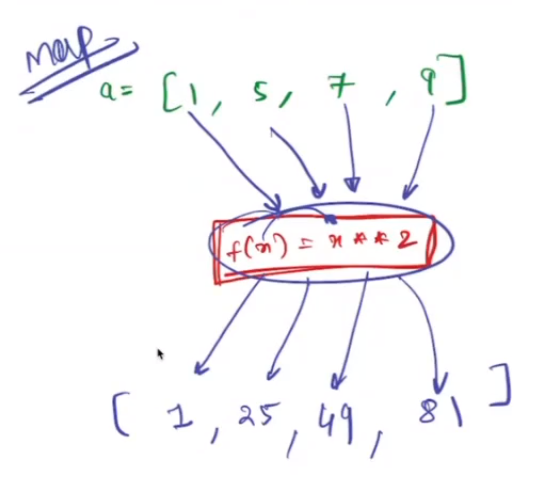

In [ ]:
# Using map() function approach

def square_n(x):
  return x**2

In [ ]:
a = [1, 5, 7, 9]

In [ ]:
m = map(square_n, a)  #NOTE: this will give a map object and we need to typecast it to get it fixed

In [ ]:
m = list(map(square_n, a))  #typecasting it to get the right o/p

In [ ]:
print(m)

[1, 25, 49, 81]


### **How to do the same lengthy "map()" function into a shorter "map() & lamba()" functions ???**

In [ ]:
print(list(map(lambda x: x**2, a)))

[1, 25, 49, 81]


### **(3) Filter function**

**filter() Function:**        
The **filter()** function creates an iterator from elements of an iterable for which a given function returns true. It filters out elements based on a condition specified by the provided function.

Here's the basic syntax of a **filter** function:

> **`filter(function, iterable)`**

### **How to filer elements from a list on the bases of a condition ???**

**Example of using "filter()" function**

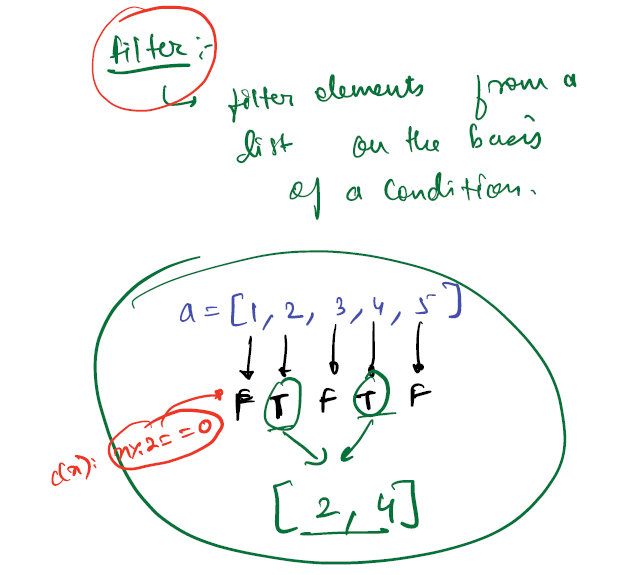

### **Filer even elements from a list...**

In [ ]:
a = list(range(1,11))

In [ ]:
print(a)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
f = list(filter(lambda x: x%2 == 0, a))

In [ ]:
print(f)

[2, 4, 6, 8, 10]


### **Write a filter - to have only > 0 values in the input**

In [ ]:
a = [9 , -2, -3, 7, -4, 1]
# op: [9, 7, 1]

In [ ]:
list(filter(lambda x: x > 0, a))

[9, 7, 1]

# **(Imp Topic) Filtering Groups**
***
**Show me data of only those directors who have done atleast 1 movie > than 10 million budget.**

Previously we resolved this question as part of the below 3 steps process:

> **`Step(1):`** **Maximum budget** of every director -   
**`data_dir_budget = data.groupby("director_name")["budget"].max().reset_index()`**

> **`Step(2):`** Then we used that as **Masking** and we then had all the **name** -    
**`names = data_dir_budget.loc[ data_dir_budget["budget"] > 10000000, ["director_name"]]`**

> **`Step(3):`** Then we used the **isin()** function to get the data -     
**`data.loc[data["director_name"].isin(names['director_name'])]`**

Now, let's finish all of that in a single line code using **Filter of Group By `(i.e. fitering groups)`**...

**How does filtering group works ???**

If we get a director who has atleast one of the movie greater than 100M, then all the movies belonging to that director we will get as o/p...

**Example of how the "Filtering Groups" works**

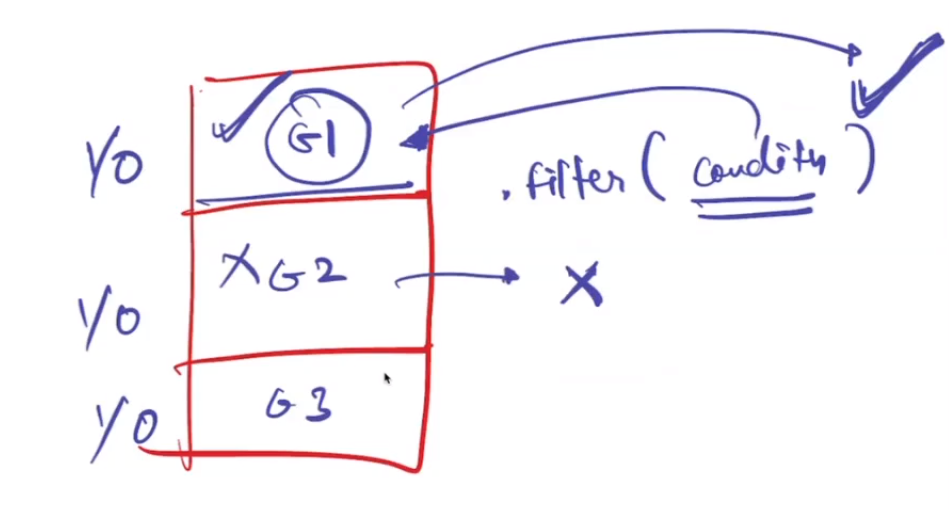

In [ ]:
# NOTE:
# "lambda x" is nothing but one group DataFrame. That is, "data.groupby("director_name")"
# Aggregate is nothing but the "max()"
# Filterng is the maximum budget of a single group is greater than 100M. That is, "filter( lambda x: x["budget"].max() > 100000000)"

data.groupby("director_name").filter( lambda x: x["budget"].max() > 100000000)

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male
...,...,...,...,...,...,...,...,...,...,...,...,...
1450,48267,400000,33,100000000,Mad Max,6.6,1213,1979,Apr,Thursday,George Miller,Male
1451,48268,200000,13,4505922,Swingers,6.8,253,1996,Oct,Friday,Doug Liman,Male
1452,48274,0,5,2611555,Three,6.3,31,2010,Dec,Thursday,Tom Tykwer,Male
1458,48335,60000,27,3221152,Pi,7.1,586,1998,Jul,Friday,Darren Aronofsky,Male


# **Continue with New Lecture...**
***

### **Categorise a movie as risky or not risky**

Every director will have mutiple movies. So I will consider a movie to be risky if the budget of the movie is greater than or equal to the average revenue of movies handled by that director. The o/p will be **True** if the movie is risky or else **False**.

**Example of how the task works**

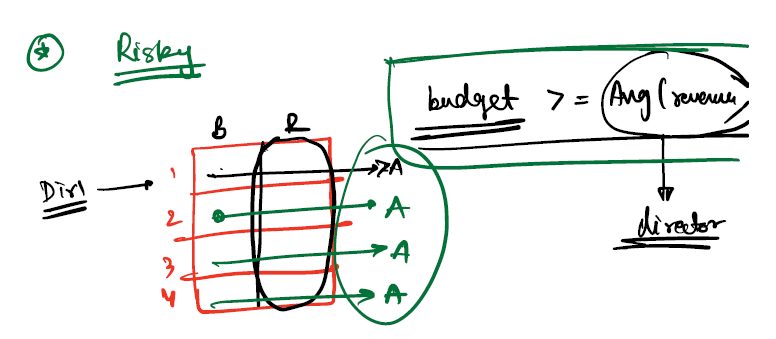


In [ ]:
def check_risky(df):
  risky_flag =  df["budget"] >= df["revenue"].mean()
  df["risky"] = risky_flag
  return df

In [ ]:
data_risky = data.groupby("director_name").apply(check_risky)  # ignore the worning notification

<ipython-input-78-651148c61a41>:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  data_risky = data.groupby("director_name").apply(check_risky)  # ignore the worning notification


In [ ]:
data_risky.head()

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,risky
0,43597,237000000,150,2787965087,Avatar,7.2,11800,2009,Dec,Thursday,James Cameron,Male,False
1,43598,300000000,139,961000000,Pirates of the Caribbean: At World's End,6.9,4500,2007,May,Saturday,Gore Verbinski,Male,False
2,43599,245000000,107,880674609,Spectre,6.3,4466,2015,Oct,Monday,Sam Mendes,Male,False
3,43600,250000000,112,1084939099,The Dark Knight Rises,7.6,9106,2012,Jul,Monday,Christopher Nolan,Male,False
4,43602,258000000,115,890871626,Spider-Man 3,5.9,3576,2007,May,Tuesday,Sam Raimi,Male,False


### **Give me only those movies which are risky**

In [ ]:
data_risky.loc[data_risky["risky"] == True]  # simple masking

,id_x,budget,popularity,revenue,title,vote_average,vote_count,year,month,day,director_name,gender,risky
7,43608,200000000,107,586090727,Quantum of Solace,6.1,2965,2008,Oct,Thursday,Marc Forster,Male,True
12,43614,380000000,135,1045713802,Pirates of the Caribbean: On Stranger Tides,6.4,4948,2011,May,Saturday,Rob Marshall,Male,True
15,43618,200000000,37,310669540,Robin Hood,6.2,1398,2010,May,Wednesday,Ridley Scott,Male,True
20,43624,209000000,64,303025485,Battleship,5.5,2114,2012,Apr,Wednesday,Peter Berg,Male,True
24,43630,210000000,3,459359555,X-Men: The Last Stand,6.3,3525,2006,May,Wednesday,Brett Ratner,Male,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,47224,5000000,7,3263585,The Sweet Hereafter,6.8,103,1997,May,Wednesday,Atom Egoyan,Male,True
1349,47229,5000000,3,4842699,90 Minutes in Heaven,5.4,40,2015,Sep,Friday,Michael Polish,Male,True
1351,47233,5000000,6,0,Light Sleeper,5.7,15,1992,Aug,Friday,Paul Schrader,NaN,True
1356,47263,15000000,10,0,Dying of the Light,4.5,118,2014,Dec,Thursday,Paul Schrader,NaN,True


### **How to get this counts of titles for each group of director names ???**

> **`Approach (1):`** Use with **"value_counts()"**

> **`Approach (2):`** Use **without "value_counts()"** and get this **same o/p**

**Approach (1):** Use with **"value_counts()"**

In [ ]:
data["director_name"].value_counts()

Steven Spielberg      26
Martin Scorsese       19
Clint Eastwood        19
Woody Allen           18
Ridley Scott          16
                      ..
Tim Hill               5
Jonathan Liebesman     5
Roman Polanski         5
Larry Charles          5
Nicole Holofcener      5
Name: director_name, Length: 199, dtype: int64

**Approach (2):** Use without **"value_counts()"** and get this **same o/p**

In [ ]:
data.groupby("director_name")["title"].count()

director_name
Adam McKay                      6
Adam Shankman                   8
Alejandro González Iñárritu     6
Alex Proyas                     5
Alexander Payne                 5
                               ..
Wes Craven                     10
Wolfgang Petersen               7
Woody Allen                    18
Zack Snyder                     7
Zhang Yimou                     6
Name: title, Length: 199, dtype: int64

In [ ]:
data.groupby("director_name")["title"].count().sort_values()

director_name
Kevin Reynolds       5
George Clooney       5
Gavin O'Connor       5
Gary Winick          5
Michael Apted        5
                    ..
Spike Lee           16
Woody Allen         18
Clint Eastwood      19
Martin Scorsese     19
Steven Spielberg    26
Name: title, Length: 199, dtype: int64

In [ ]:
data.groupby("director_name")["title"].count().sort_values(ascending = False)

director_name
Steven Spielberg    26
Clint Eastwood      19
Martin Scorsese     19
Woody Allen         18
Robert Rodriguez    16
                    ..
Paul Weitz           5
John Madden          5
Paul Verhoeven       5
John Whitesell       5
Kevin Reynolds       5
Name: title, Length: 199, dtype: int64

### **Most productive director --> no.of movies directed per year**

That is, on an average, how many movies does a director makes on early bases ???

To find **number of years the director was active**, we are using **(max_year - min_year)** for that particular director.

The **productivity** is nothing but the **count of movies/title of that particular director divided by number of active years**.

**Example of how the task works**

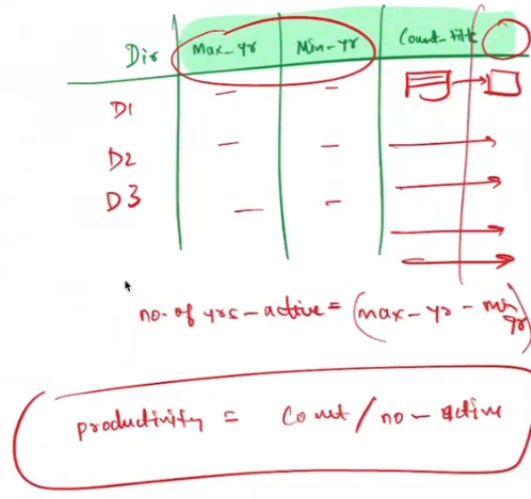


In [ ]:
# this was just doing 2 aggregations on a single column

data.groupby("director_name")["year"].aggregate(["min" , "max"])

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


In [ ]:
# but now, we have to do 2 columns with multiple aggregations on them.
# This is a high level of Grouping & Aggregation...

# NOTE: writing aggregation as ".aggregate(["min", "max", "count"])" will be confusing.
# So to get a better approach, we will do Maping of what functions to by applied on what column using a Dictionary.
# The Dictionary has the key as column name & value as list of aggregations that you want to perform...

data_agg = data.groupby("director_name")[ ["year" , "title"] ].aggregate(
    {
      "year" : ["min" , "max"] ,
     "title" : "count"}
    )

In [ ]:
# Most productive director --> no.of movies directed per year

data_agg.head()

year       title
                              min   max count
director_name                                
Adam McKay                   2004  2015     6
Adam Shankman                2001  2012     8
Alejandro González Iñárritu  2000  2015     6
Alex Proyas                  1994  2016     5
Alexander Payne              1999  2013     5

In [ ]:
data_agg.columns  # the variable is stored as "MultiIndex". It's actually a List of Tuples...

MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

**That is, the "MultiIndex" o/p is as below**

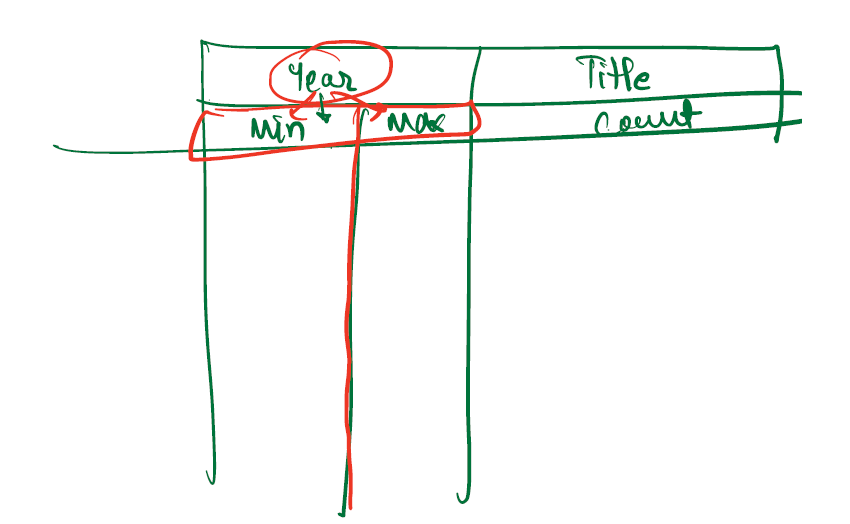

But the o/p seems **confusing** isn't it ?

For example, if we want to **extract/fiter** only the **"year"** column, what will be the o/p ???

In [ ]:
data_agg["year"]

,min,max
director_name,,
Adam McKay,2004,2015
Adam Shankman,2001,2012
Alejandro González Iñárritu,2000,2015
Alex Proyas,1994,2016
Alexander Payne,1999,2013
...,...,...
Wes Craven,1984,2011
Wolfgang Petersen,1981,2006
Woody Allen,1977,2013


So in order to make this **generic**, let's **seperate all the columns** in the table instead of having any **hierarchy** on the **"year"** column like first **"min"** then **"max"**, etc...

**That is, a better o/p would be as below to make it very easy to access**

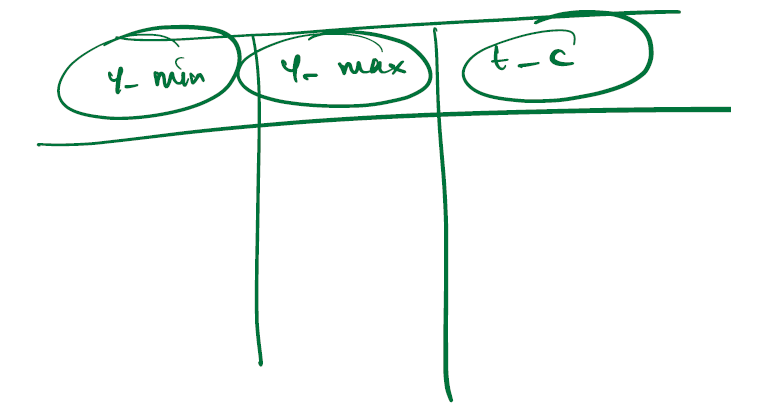



In [ ]:
data_agg.columns

MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

Since the above is actually a **list of tuples**, let's do **List Comprehension** to make things right...

That is, **joining the elements of a list or tuple using list comprehension**.

For example:
> **`my_list = ['Hello', 'World', 'OpenAI', 'ChatGPT']`**     
**`joined_string = ' '.join([str(item) for item in my_list])`**      
**`print(joined_string) `**   

In this example, we have a list **my_list** containing strings. The list comprehension **[str(item) for item in my_list]** is used to convert each item in the list to a string. The resulting list of strings is then joined using the **join()** method with a space delimiter **' '** to create a single string.

The output will be:
> **`Hello World OpenAI ChatGPT`**

In [ ]:
# Another example

a = ["you" , "guys" , "are" , "awesome"]

In [ ]:
ans = "_".join(a)

In [ ]:
print(ans)

you_guys_are_awesome


**`NOTE:` Getting back to the data of given task...**


In [ ]:
data_agg.columns

MultiIndex([( 'year',   'min'),
            ( 'year',   'max'),
            ('title', 'count')],
           )

In [ ]:
data_agg.columns = [ "_".join(col) for col in data_agg.columns]

In [ ]:
data_agg.columns

Index(['year_min', 'year_max', 'title_count'], dtype='object')

In [ ]:
data_agg.head()  # the o/p is still not fixed as per our needs. Hence, we need to reset_index to get this fxed...

,year_min,year_max,title_count
director_name,,,
Adam McKay,2004,2015,6
Adam Shankman,2001,2012,8
Alejandro González Iñárritu,2000,2015,6
Alex Proyas,1994,2016,5
Alexander Payne,1999,2013,5


**`NOTE:`**The below o/p is exactly the same o/p that was wanted as per the image under **"Most productive director --> no.of movies directed per year"** section...

In [ ]:
data_agg.reset_index()   #expected o/p

,director_name,year_min,year_max,title_count
0,Adam McKay,2004,2015,6
1,Adam Shankman,2001,2012,8
2,Alejandro González Iñárritu,2000,2015,6
3,Alex Proyas,1994,2016,5
4,Alexander Payne,1999,2013,5
...,...,...,...,...
194,Wes Craven,1984,2011,10
195,Wolfgang Petersen,1981,2006,7
196,Woody Allen,1977,2013,18
197,Zack Snyder,2004,2016,7


### **Let's do the same task in a single line (i.e. easier approach)**

In [ ]:
# Old Approach - just for our reference

data_agg = data.groupby("director_name")[ ["year" , "title"] ].aggregate(
    {
      "year" : ["min" , "max"] ,
     "title" : "count"}
    )

In [ ]:
# New & best Approach

data_agg = data.groupby("director_name")[ ["year" , "title"]].aggregate(

  # new_colm = (colm_name, aggregaton)
  year_min = ('year', 'min'),
  year_max = ('year' , 'max'),
  title_count = ('title', 'count')

)

In [ ]:
data_agg.head()

,year_min,year_max,title_count
director_name,,,
Adam McKay,2004,2015,6
Adam Shankman,2001,2012,8
Alejandro González Iñárritu,2000,2015,6
Alex Proyas,1994,2016,5
Alexander Payne,1999,2013,5


In [ ]:
data_agg.reset_index()

,director_name,year_min,year_max,title_count
0,Adam McKay,2004,2015,6
1,Adam Shankman,2001,2012,8
2,Alejandro González Iñárritu,2000,2015,6
3,Alex Proyas,1994,2016,5
4,Alexander Payne,1999,2013,5
...,...,...,...,...
194,Wes Craven,1984,2011,10
195,Wolfgang Petersen,1981,2006,7
196,Woody Allen,1977,2013,18
197,Zack Snyder,2004,2016,7


### **What are the active years now ???**

In [ ]:
data_agg["years_active"] = data_agg["year_max"] - data_agg["year_min"]  + 1

In [ ]:
data_agg.head()

,year_min,year_max,title_count,years_active
director_name,,,,
Adam McKay,2004,2015,6,12
Adam Shankman,2001,2012,8,12
Alejandro González Iñárritu,2000,2015,6,16
Alex Proyas,1994,2016,5,23
Alexander Payne,1999,2013,5,15


### **How to get the Productivity parameter now ???**

The **productivity** is nothing but the **count of movies/title of that particular director divided by number of active years**.

In [ ]:
data_agg["movie_per_yr"] = data_agg["title_count"]/data_agg["years_active"]

In [ ]:
data_agg.head(30)

,year_min,year_max,title_count,years_active,movie_per_yr
director_name,,,,,
Adam McKay,2004,2015,6,12,0.500000
Adam Shankman,2001,2012,8,12,0.666667
Alejandro González Iñárritu,2000,2015,6,16,0.375000
Alex Proyas,1994,2016,5,23,0.217391
Alexander Payne,1999,2013,5,15,0.333333
Andrew Adamson,2001,2012,5,12,0.416667
Andrew Niccol,1997,2015,5,19,0.263158
Andrzej Bartkowiak,2000,2009,5,10,0.500000
Andy Fickman,2006,2015,6,10,0.600000


### **Top 5 directors with the most number of movies per year**

In [ ]:
data_agg.sort_values("movie_per_yr", ascending = False)

,year_min,year_max,title_count,years_active,movie_per_yr
director_name,,,,,
Tyler Perry,2006,2013,9,8,1.125000
Jason Friedberg,2006,2010,5,5,1.000000
Shawn Levy,2002,2014,11,13,0.846154
Robert Rodriguez,1992,2014,16,23,0.695652
Adam Shankman,2001,2012,8,12,0.666667
...,...,...,...,...,...
Lawrence Kasdan,1985,2012,5,28,0.178571
Luc Besson,1985,2014,5,30,0.166667
Michael Apted,1980,2010,5,31,0.161290


In [ ]:
data_agg.sort_values("movie_per_yr", ascending = False).head(5)

,year_min,year_max,title_count,years_active,movie_per_yr
director_name,,,,,
Tyler Perry,2006,2013,9,8,1.125000
Jason Friedberg,2006,2010,5,5,1.000000
Shawn Levy,2002,2014,11,13,0.846154
Robert Rodriguez,1992,2014,16,23,0.695652
Adam Shankman,2001,2012,8,12,0.666667


# **How to save your analysis ???**

In [ ]:
data_agg.to_csv("output.csv", sep = ",")